In [11]:
import os
import sys
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision.transforms import Compose
import matplotlib.pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from data_acquisition.data_utils import plot_image_and_mask, plot_image_mask_batch, plot_masked_image
from data_loader.datasets import SentinelLandCoverSwedenDataset
from data_loader.data_loaders import ToTensor

%reload_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\Max Johansson\AppData\Local\Temp\ipykernel_17572\4225572788.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


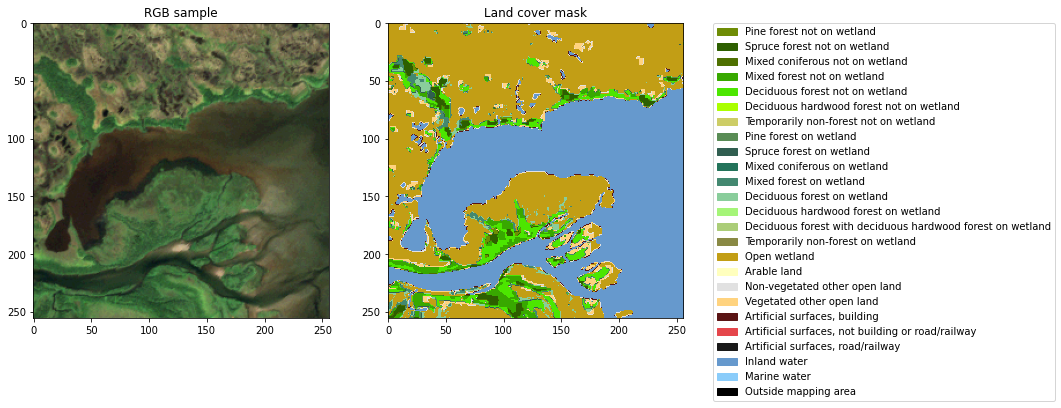

In [33]:
file_index_to_plot = 0
'''
Nice files to plot: 0
'''

data_dir = 'data\\SentinelLandCoverSweden\\dataset\\'
file_names = os.listdir(data_dir)

img = np.genfromtxt(os.path.join(data_dir, file_names[file_index_to_plot]), delimiter=',')
img = img.reshape(256, 256, 14)
mask = img[:, :, -1]


fig = plot_image_and_mask(img[:, :, [3, 2, 1]], mask)
plt.savefig('images\\labeled_1.svg', dpi=1000, bbox_inches='tight')
fig.show()
# plt.show()
# plot_masked_image(img, mask, mask_code=51)

0 torch.Size([4, 13, 256, 256]) torch.Size([4, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


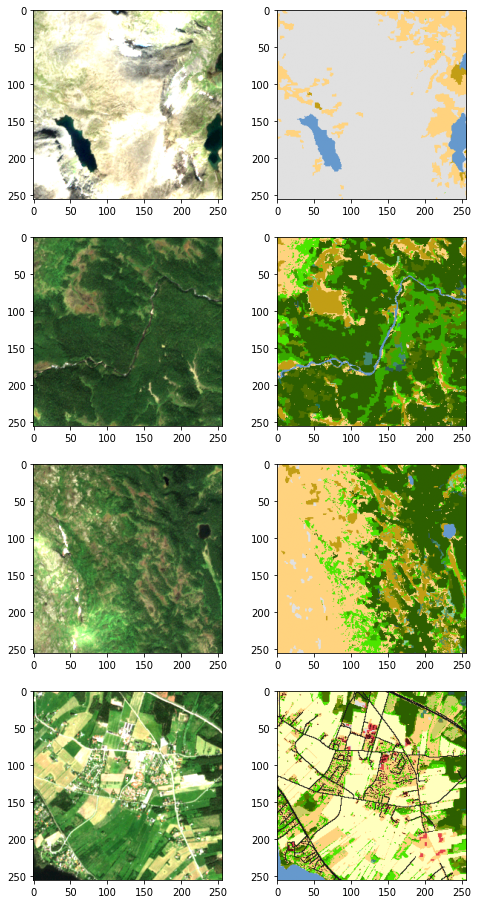

In [66]:
transformed_dataset = SentinelLandCoverSwedenDataset(
    data_dir = 'data\\SentinelLandCoverSweden\\dataset',
    transform = Compose([
        ToTensor()
    ])
)

data_loader = torch.utils.data.DataLoader(dataset=transformed_dataset, batch_size=4, shuffle=True, num_workers=0)

for i_batch, batch in enumerate(data_loader):
    print(i_batch, batch['image'].size(),
        batch['mask'].size())

    # observe 4th batch and stop.
    if i_batch == 0:
        fig = plot_image_mask_batch(batch)
        # plt.savefig('images\\labeled_samples_1.svg', dpi=1000, bbox_inches='tight')
        # plt.axis('off')
        # plt.ioff()
        # plt.show()
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


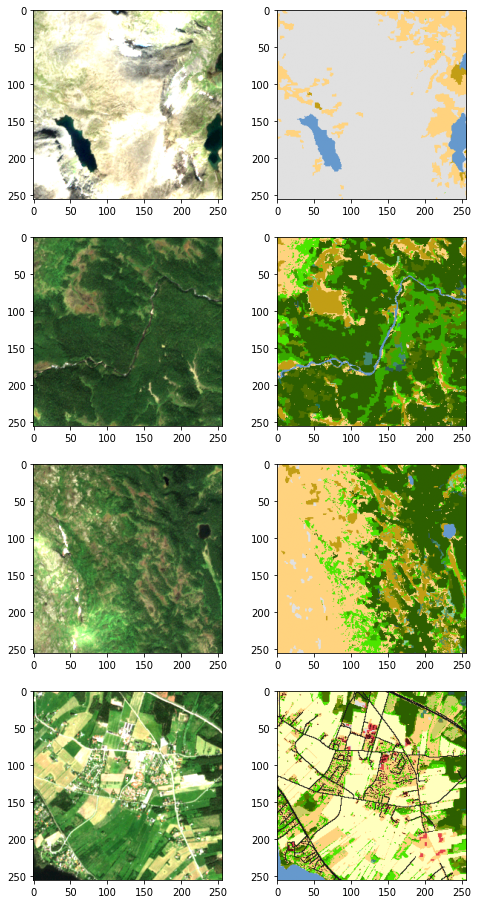

In [69]:
fig = plot_image_mask_batch(batch)
plt.savefig('images\\labeled_samples_1.svg', dpi=1000, bbox_inches='tight')
plt.show()